# Final personal code

Author: Shangfei Wang | Date: 28/10/2022

In this TPP, I will replace the other two datasets for testing on my subproblem. My sub-question is "Is weekly steps predictable?".

## Import packages and Read Data

Below are the packages that need to be used. 'datetime' is used to aid in the analysis of time data.

In [1]:
# Date started: 10/10/2022

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.arima.model import ARIMA   #Add new packages that need to be used


Read the data, here will read the data of three participants 4, 7, and 8 for analysis.

In [2]:
# Date started: 02/10/2022
# Modified Date: 17/10/2022

# df = pd.read_csv("resources/Participant-07.csv")

# Participant-07
df7 = pd.read_csv("resources/Participant-07.csv")

# # Participant-08
df8 = pd.read_csv("resources/Participant-08.csv")

# # Participant-04
df4 = pd.read_csv("resources/Participant-04.csv")


## Data clean

First, split the date and time to facilitate subsequent analysis of the date.

In [3]:
# Date started: 10/10/2022
def split_start(df):
    df['Date'] = df['Start'].map(lambda x:x.split(' ')[0])  # Split to get 'Date' column
    df['Time'] = df['Start'].map(lambda x:x.split(' ')[1])  # Split to get 'Time' column
    return

split_start(df4)
split_start(df7)
split_start(df8)
df4

,Start,Finish,Steps (count),Date,Time
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0,01-Jan-2022,00:00
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0,01-Jan-2022,01:00
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0,01-Jan-2022,02:00
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0,01-Jan-2022,03:00
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0,01-Jan-2022,04:00
...,...,...,...,...,...
6018,08-Sep-2022 17:00,08-Sep-2022 18:00,537.0,08-Sep-2022,17:00
6019,08-Sep-2022 18:00,08-Sep-2022 19:00,188.0,08-Sep-2022,18:00
6020,08-Sep-2022 19:00,08-Sep-2022 20:00,215.0,08-Sep-2022,19:00
6021,08-Sep-2022 20:00,08-Sep-2022 21:00,727.0,08-Sep-2022,20:00


## Data analysis

Replace index and set date as index.

In [4]:
# Date started: 10/10/2022
def index_data(df):
    df['date'] = pd.to_datetime(df['Date'])
    df.set_index("date", inplace=True) # change index
    df.resample('w').sum()
    return

index_data(df4)
index_data(df7)
index_data(df8)


Setting the date as index is to consolidate the data for a week. This matches the time frequency of advanced driving problems.

The data is aggregated by running resample('w').sum() . The data is consolidated from daily recorded steps into weekly steps.

Resample in Pandas, resampling, is a method of reprocessing the original sample, and it is a convenient method for resampling and frequency conversion of regular time series data.

In [5]:
# Date started: 10/10/2022
def time_week(df):
    print(df.resample('w').sum()) # 'w' stands for weeks.
    return

time_week(df4)
time_week(df7)
time_week(df8)


            Steps (count)
date                     
2022-01-02   24106.000000
2022-01-09   71137.008341
2022-01-16   72000.345535
2022-01-23   76708.552968
2022-01-30   82691.949753
2022-02-06   72231.710790
2022-02-13   86187.376206
2022-02-20   83411.319657
2022-02-27   74467.556502
2022-03-06   74257.261975
2022-03-13   76971.907148
2022-03-20   88086.022544
2022-03-27   74296.550627
2022-04-03   87735.013219
2022-04-10  102352.334092
2022-04-17   91624.177476
2022-04-24   67799.814020
2022-05-01   95130.818086
2022-05-08   90964.585994
2022-05-15   91499.702645
2022-05-22  101551.263522
2022-05-29   79357.656704
2022-06-05   72173.444264
2022-06-12   67030.005687
2022-06-19   72099.640858
2022-06-26   74815.000000
2022-07-03   64281.430580
2022-07-10   91374.176529
2022-07-17   77650.116865
2022-07-24   91945.011896
2022-07-31   89171.191956
2022-08-07   64927.173432
2022-08-14   80031.000000
2022-08-21   83811.108866
2022-08-28   68071.257631
2022-09-04   80499.382549
2022-09-11  

Forecasting in days is more accurate. So I will temporarily convert the time unit in weeks to the time unit in days.

In [6]:
# Date started: 10/10/2022
def time_day(df):
    new_df = df.resample('d').sum()
    # new_df.rename({'Steps (count)': 'StepCount'}, axis=1, inplace=True)
    return new_df



In [7]:
new_df4 = time_day(df4)
new_df7 = time_day(df7)
new_df8 = time_day(df8)

It will make predictions on the participant's step count through an ARIMA model. I want to predict the data for June to September by taking the data for the first 5 months. And judge whether it is the same as the actual number of steps from June to September. Clean up and draw the image through the data. If there is a relatively obvious difference, it proves that the change in the number of steps may be affected by many factors, and it cannot be accurately predicted.

In [8]:
def predict(new_df):
    new_day_data1 = new_df
    # Create a rolling average using pandas.datafframe.rolling with a window size of 10.
    new_day_data1['rolling_av'] = new_day_data1['Steps (count)'].rolling(10).mean()
    
    # Using the ARIMA model
    ARIMA_model = ARIMA(endog=new_day_data1['Steps (count)'], order=(0, 0, 10))
    results = ARIMA_model.fit()
    
    # Determine the time period for the forecast.
    start_date = '2022-06-01'
    end_date   = '2022-09-01'
    new_day_data1['forecast'] = results.predict(start=start_date, end=end_date)  # Forecast for the selected date range.
    
    # Collate a new temp table
    a = new_day_data1[['Steps (count)','rolling_av','forecast']]
    pre_df = a.resample('w').sum()
    
    # Draw the image
    pre_df[['Steps (count)','forecast']].plot(lw=2);
    plt.title('Comparison of predicted steps and actual steps')

    return

The blue line is the trend of actual weekly steps. The yellow line is the trend of predicted steps. The prediction range can modify the code as needed. Because the forecast time I selected is June to September, the yellow line will show 0 until June. June to September is the forecast step count trend.

The image below is a plot of the participant 4 data. Comparing the actual number of steps and the predicted number of steps from June to September, it can be found that there is almost no overlap between the two discounts. This shows that there is a significant difference between the actual number of steps and the predicted number of steps.

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


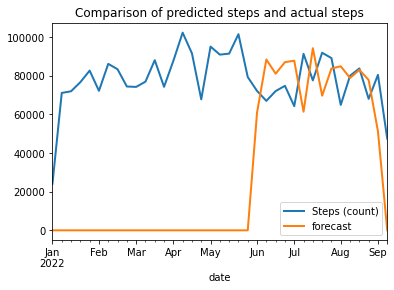

In [9]:
predict(new_df4)

The image below is a plot of the participant 7 data. Comparing the actual number of steps and the predicted number of steps from June to September, it can be found that there is almost no overlap between the two discounts. This shows that there is a significant difference between the actual number of steps and the predicted number of steps.

E:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


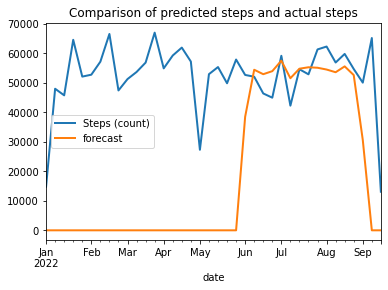

In [10]:
predict(new_df7)

The image below is a plot of the participant 8 data. Comparing the actual number of steps and the predicted number of steps from June to September, it can be found that there is almost no overlap between the two discounts. This shows that there is a significant difference between the actual number of steps and the predicted number of steps.

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


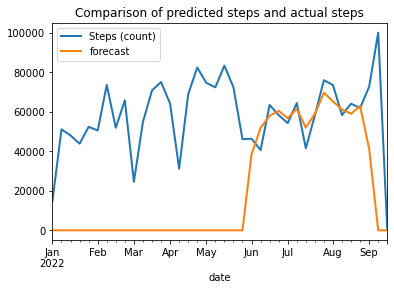

In [11]:
predict(new_df8)

## Conclusion

Through the analysis of the three graphs, the common conclusion is that there is a big difference between the actual number of steps and the predicted number of steps. This shows that the trend of human step count is unpredictable and it may be affected by many factors.